Code is done with google colab environment and i uploaded the file there and then only mentioned the name in the pandas read csv function

First we need to import our libraries and install the libraries that its not installed


In [1]:
!pip install squarify	
! pip install pandas_profiling

In [2]:
#from pandas_profiling import ProfileReport
import pandas as pd
import sqlite3
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import datetime
import matplotlib.pyplot as plt	
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import squarify
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


Import the dataset

In [3]:
retail_data=pd.read_excel('Online Retail.xlsx')

Get a profile report
This part is done with pycharm

In [4]:
#report = ProfileReport(retail_data, title='Pandas Profiling Report2', explorative=True)
#report.to_file(output_file="CW2_Data_statistics.html")

Basic data properties

In [5]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
retail_data.shape

(541909, 8)

In [7]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
retail_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
retail_data[retail_data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [11]:
retail_data.duplicated().sum()

5268

Checking the number of unique transactions

In [12]:
retail_data.InvoiceNo.nunique()

25900

Checking the unique stock ids in the data or number of unqiue item sold by retailer

In [13]:
retail_data.StockCode.nunique()

4070

Looking at the distribution of the quantity
. There is negative value which might indicate return orders

In [14]:
retail_data.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Unique customer

In [15]:
retail_data.CustomerID.nunique()

4372

In [16]:
retail_data.Description.nunique()

4223

Top 10 item sold

In [17]:
retail_data.Description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

Top 10 item sold with their quantity

In [18]:
retail_data.groupby('Description').agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


Distribution of data among the countries shows us what was obviuos and the retailer obviusly is located in UK

In [19]:
retail_data.Country.value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

Distribution of unit price

In [20]:
retail_data.UnitPrice.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          18.000000
max       38970.000000
Name: UnitPrice, dtype: float64

The time period of all purchases are between this time interval

In [21]:
print('The minimum date is:',retail_data.InvoiceDate.min())
print('The maximum date is:',retail_data.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


Removing the duplicate rows

In [22]:
print(retail_data.shape)
retail_data.drop_duplicates(inplace=True)
print(retail_data.shape)

(541909, 8)
(536641, 8)


Connect to database

In [23]:
conn = sqlite3.connect("RFMdb")
cur = conn.cursor() 

# load data into the RFMdb database
retail_data.to_sql("Online_Retail", conn)

# Check if the data is inserted in data/RFMdb
retail_data_sql = pd.read_sql('SELECT * FROM Online_Retail', conn)
retail_data_sql


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
536636,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
536637,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
536638,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
536639,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Clean data 

In [24]:
retail_data_sql_cleaned= pd.read_sql(''' SELECT *
      FROM Online_Retail
      WHERE InvoiceNo NOT LIKE '%C%'
      AND CustomerID IS NOT NULL
      AND Description IS NOT NULL
      AND Description NOT LIKE '%?%'
      AND UnitPrice >= 0
      AND Quantity >= 0''', conn)

# Write clean CRM data into the database
retail_data_sql_cleaned.to_sql("retail_data_sql_cleaned", conn)
retail_data_sql_cleaned

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
392727,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
392728,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
392729,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
392730,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Making sure there is no duplicated rows and remove if there is duplicate rows.

In [25]:
print(retail_data_sql_cleaned.shape)
retail_data_sql_cleaned.drop_duplicates(inplace=True)
print(retail_data_sql_cleaned.shape)

(392732, 9)
(392732, 9)


Do the preproccessing stages again for data that is been cleaned for the rfm segmentation proccessing

In [26]:
retail_data_sql_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 392731
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        392732 non-null  int64  
 1   InvoiceNo    392732 non-null  object 
 2   StockCode    392732 non-null  object 
 3   Description  392732 non-null  object 
 4   Quantity     392732 non-null  int64  
 5   InvoiceDate  392732 non-null  object 
 6   UnitPrice    392732 non-null  float64
 7   CustomerID   392732 non-null  float64
 8   Country      392732 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 30.0+ MB


In [27]:
retail_data_sql_cleaned.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Distribution of InvoiceNo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

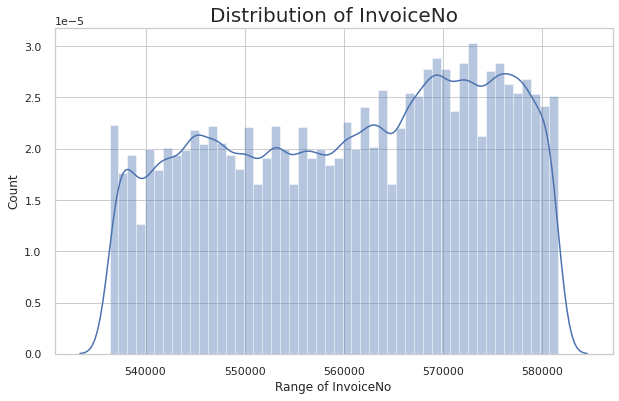

In [28]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(retail_data_sql_cleaned['InvoiceNo'])
plt.title('Distribution of InvoiceNo', fontsize = 20)
plt.xlabel('Range of InvoiceNo')
plt.ylabel('Count')


Distribution of CustomerID

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

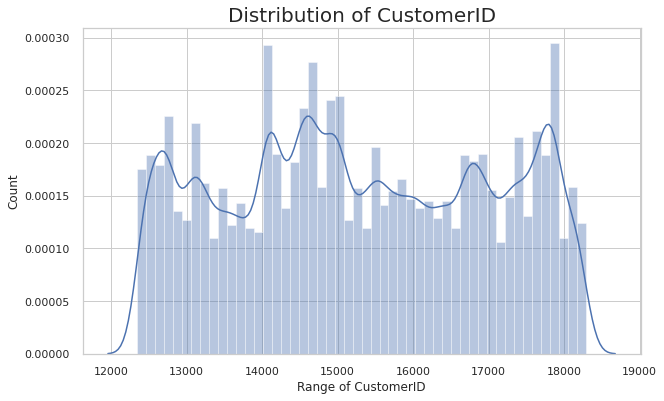

In [29]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(retail_data_sql_cleaned['CustomerID'])
plt.title('Distribution of CustomerID', fontsize = 20)
plt.xlabel('Range of CustomerID')
plt.ylabel('Count')

Correlation analysis

In [30]:
retail_data_sql_cleaned.iloc[:,1:].corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004577,-0.00621
UnitPrice,-0.004577,1.000000,-0.01079
CustomerID,-0.006210,-0.010790,1.00000


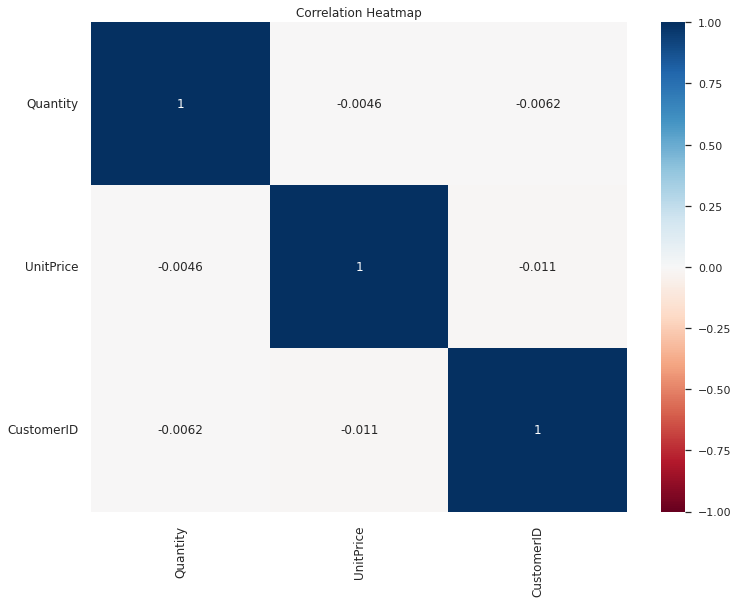

In [31]:
plt.figure(figsize=(12, 9))
s=sns.heatmap(retail_data_sql_cleaned.iloc[:,1:].corr(),
              annot=True,
              cmap='RdBu',
              vmin=-1,
              vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

RFM can be find in two different ways

First is to only use sqlite to create it another way is using the clean data for creating both of them are used first with sql

In [32]:
RFM_with_sql= pd.read_sql(''' SELECT CustomerID,
          MAX(InvoiceDate) AS last_order_date,
          COUNT(*) AS count_order,
          SUM(UnitPrice*Quantity) AS Totalprice
      FROM Online_Retail
      WHERE InvoiceNo NOT LIKE '%C%'
      AND CustomerID IS NOT NULL
      AND Description IS NOT NULL
      AND Description NOT LIKE '%?%'
      AND UnitPrice >= 0
      AND Quantity >= 0
      GROUP BY CustomerID ''', conn)
# Write clean CRM data into the database
RFM_with_sql.to_sql("RFM_with_sql", conn)
RFM_with_sql

,CustomerID,last_order_date,count_order,Totalprice
0,12346.0,2011-01-18 10:01:00,1,77183.60
1,12347.0,2011-12-07 15:52:00,182,4310.00
2,12348.0,2011-09-25 13:13:00,31,1797.24
3,12349.0,2011-11-21 09:51:00,73,1757.55
4,12350.0,2011-02-02 16:01:00,17,334.40
...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,10,180.60
4335,18281.0,2011-06-12 10:53:00,7,80.82
4336,18282.0,2011-12-02 11:43:00,12,178.05
4337,18283.0,2011-12-06 12:02:00,721,2045.53


In [33]:
RFM_with_sql['last_order_date']=pd.to_datetime(RFM_with_sql['last_order_date']).dt.date
RFM_with_sql['last_order_date']=(RFM_with_sql.last_order_date.max()-RFM_with_sql['last_order_date']).dt.days+1
#converting the names of the columns
RFM_with_sql.rename(columns = {'last_order_date' : "Recency",'count_order' : "Frequency",
                          'Totalprice' : "Monetary"},inplace = True)
RFM_with_sql

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,721,2045.53


Now we create it using group.by on cleaned data after sql command just for cleaning

In [34]:
retail_data_sql_cleaned['TotalAmount']=retail_data_sql_cleaned['UnitPrice']*retail_data_sql_cleaned['Quantity']
retail_data_sql_cleaned['InvoiceDate']=pd.to_datetime(retail_data_sql_cleaned['InvoiceDate']).dt.date
Latest_date=retail_data_sql_cleaned['InvoiceDate'].max()
RFM_with_python = retail_data_sql_cleaned.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days+1,
                                          'InvoiceNo' : 'count','TotalAmount' : 'sum'}).reset_index()
RFM_with_python.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)  
RFM_with_python                                      

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,721,2045.53


In [59]:
RFM_with_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [36]:
RFM_with_sql.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,93.041484,90.512100,2048.215924
std,1721.889758,100.007757,225.515328,8984.248352
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,17.000000,306.455000
50%,15299.000000,51.000000,41.000000,668.560000
75%,16778.500000,142.500000,98.000000,1660.315000
max,18287.000000,374.000000,7676.000000,280206.020000


Distribution of Frequency

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

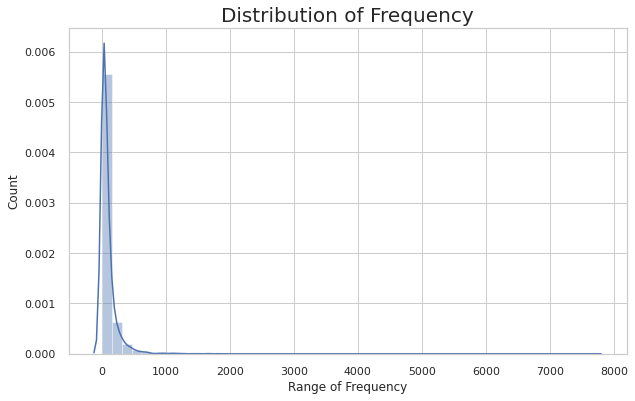

In [37]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(RFM_with_sql['Frequency'])
plt.title('Distribution of Frequency', fontsize = 20)
plt.xlabel('Range of Frequency')
plt.ylabel('Count')

Distribution of Recency

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

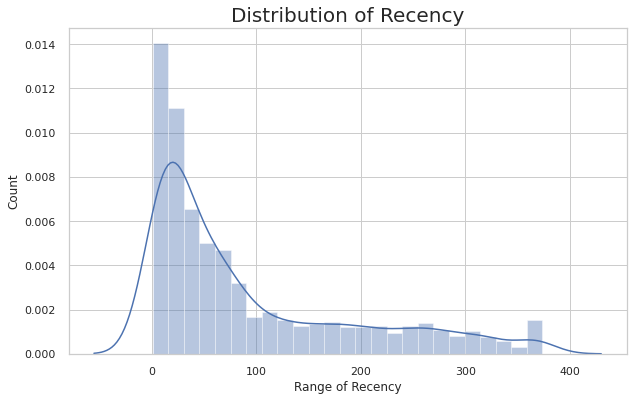

In [38]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(RFM_with_sql['Recency'])
plt.title('Distribution of Recency', fontsize = 20)
plt.xlabel('Range of Recency')
plt.ylabel('Count')

Distribution of Monetary


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

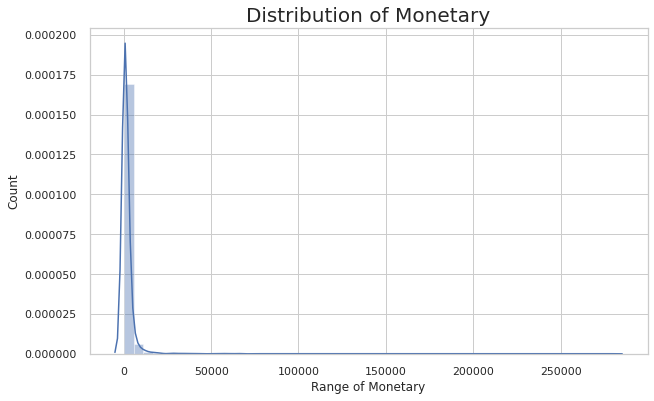

In [39]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(RFM_with_sql['Monetary'])
plt.title('Distribution of Monetary', fontsize = 20)
plt.xlabel('Range of Monetary')
plt.ylabel('Count')

Correlation analysis on data ready for segmentation with kmeans

In [40]:
RFM_with_sql.corr()

,CustomerID,Recency,Frequency,Monetary
CustomerID,1.000000,0.008063,-0.002845,-0.013757
Recency,0.008063,1.000000,-0.206405,-0.121924
Frequency,-0.002845,-0.206405,1.000000,0.425442
Monetary,-0.013757,-0.121924,0.425442,1.000000


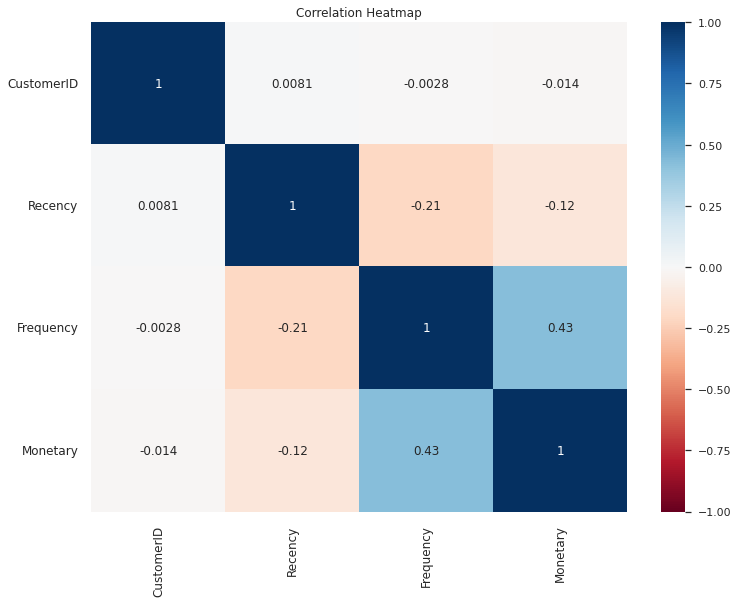

In [41]:
plt.figure(figsize=(12, 9))
s=sns.heatmap(RFM_with_sql.corr(),
              annot=True,
              cmap='RdBu',
              vmin=-1,
              vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

Plot recency, monetary and frequency based on each other

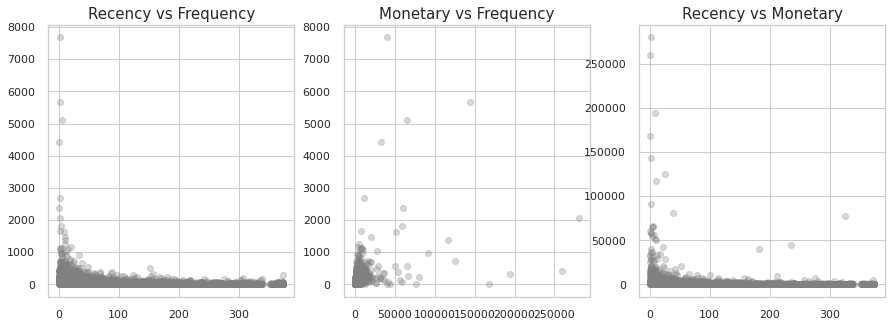

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(RFM_with_sql.Recency, RFM_with_sql.Frequency, color='grey', alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(RFM_with_sql.Monetary, RFM_with_sql.Frequency, color='grey', alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(RFM_with_sql.Recency, RFM_with_sql.Monetary, color='grey', alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.show()

Seeing the outliers with boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


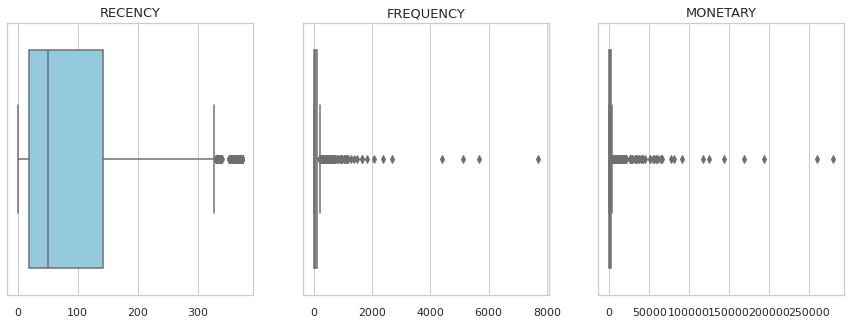

In [43]:
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(RFM_with_sql[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

Kmeans algorithm is sensitive to the scale and also outliers can mess up the distiribution, it is possible to remove them

Create a function for detecting outliers and use the 10 and 90 percentile to get rid of the outliers

In [44]:
def outliers(dataframe, feature):
    q1 = dataframe[feature].quantile(0.10)
    q3 = dataframe[feature].quantile(0.90)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    ls = dataframe.index[ (dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound) ]
    return ls

''' Create a list to see the indexes of outliers for dataset and also only detect outliers 
for the columns that are going to be used in analysis'''

outliers_index = []
for column in ['Recency','Frequency','Monetary']:
  outliers_index.extend(outliers(RFM_with_sql, column))
outliers_index,len(outliers_index)

# Create a function for deleting outliers based on their indexes

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
RFM_with_sql_cleaned = remove(RFM_with_sql,outliers_index)
RFM_with_sql_cleaned.reset_index(drop=True, inplace=True)

# See howe many outliers were detected and deleted

print(len(RFM_with_sql_cleaned))
print(len(RFM_with_sql))


4170
4339


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


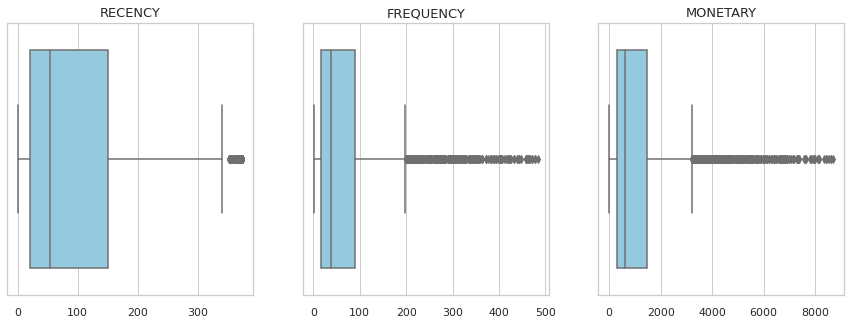

In [56]:
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(RFM_with_sql_cleaned[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [46]:
RFM_with_sql_kmeans = RFM_with_sql_cleaned.iloc[:,1:]
# scaling the variables and store it in different df for kmeans
scaler = StandardScaler()
RFM_with_sql_kmeans_norm = scaler.fit_transform(RFM_with_sql_kmeans)

# converting it into dataframe
RFM_with_sql_kmeans_norm = pd.DataFrame(RFM_with_sql_kmeans_norm)
RFM_with_sql_kmeans_norm.columns = ['Recency','Frequency','Monetary']
RFM_with_sql_kmeans_norm.head()

,Recency,Frequency,Monetary
0,-0.925664,1.417298,2.263709
1,-0.199532,-0.467068,0.455398
2,-0.766512,0.057060,0.426835
3,2.138017,-0.641777,-0.597337
4,-0.587466,0.206811,0.965487


Finding the number of clusters with elbow method and silhoutte score

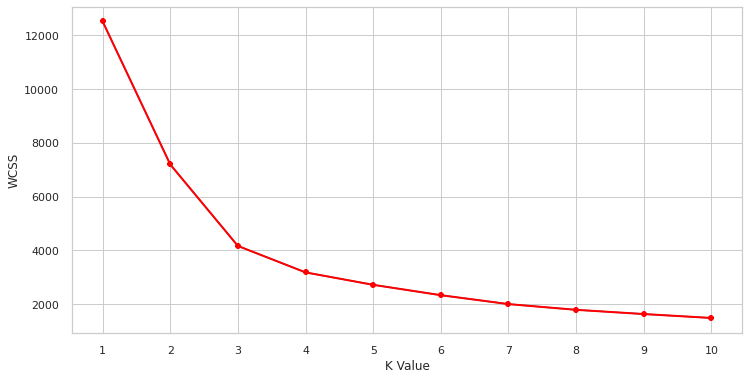

In [47]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300)
    kmeans.fit(RFM_with_sql_kmeans_norm)
    wcss.append(kmeans.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

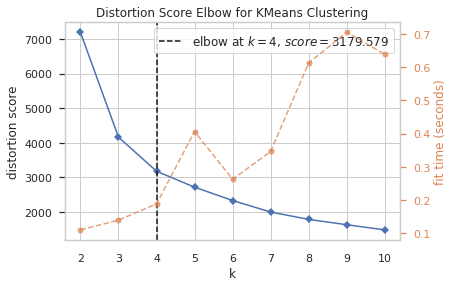

For n_clusters=2, the silhouette score is 0.3548939104148448
For n_clusters=3, the silhouette score is 0.3561131779809255
For n_clusters=4, the silhouette score is 0.35624308924438786
For n_clusters=5, the silhouette score is 0.35117942883635617
For n_clusters=6, the silhouette score is 0.35491746303459354
For n_clusters=7, the silhouette score is 0.34846638965903287
For n_clusters=8, the silhouette score is 0.3549526708686406
For n_clusters=9, the silhouette score is 0.35573712697549487
For n_clusters=10, the silhouette score is 0.355411134302283


<Figure size 432x288 with 0 Axes>

In [48]:
# Elbow method with Yellowbrick Visualiser
visualizer = KElbowVisualizer(kmeans, k=(2, 11))
visualizer.fit(RFM_with_sql_kmeans_norm)
visualizer.show()


# Silhouette score for finding number of clusters
for i in range(2,11):
    # intialise kmeans
    kmeans.fit(RFM_with_sql_kmeans_norm)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RFM_with_sql_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

In [49]:
#Taking 4 clusters
km1=KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300)
#Fitting the input data
km1.fit(RFM_with_sql_kmeans_norm)
#predicting the labels of the input data
y=km1.predict(RFM_with_sql_kmeans_norm)
#adding the labels to a column named label
RFM_with_sql_kmeans["label"] = y
#The new dataframe with the clustering done
RFM_with_sql_kmeans


,Recency,Frequency,Monetary,label
0,3,182,4310.00,3
1,76,31,1797.24,0
2,19,73,1757.55,1
3,311,17,334.40,2
4,37,85,2506.04,1
...,...,...,...,...
4165,74,9,173.90,0
4166,278,10,180.60,2
4167,181,7,80.82,2
4168,8,12,178.05,0


See the distribution of members between 4 clusters

In [50]:
RFM_with_sql_kmeans['label'].value_counts()

0    2024
2     992
1     841
3     313
Name: label, dtype: int64

See the mean of rfm values for each cluster

In [51]:
RFM_with_sql_kmeans.groupby('label').mean()

,Recency,Frequency,Monetary
label,,,
0,53.268281,35.206028,601.012986
1,38.340071,127.467301,2089.570025
2,254.928427,23.912298,409.286038
3,24.345048,265.702875,4715.368147


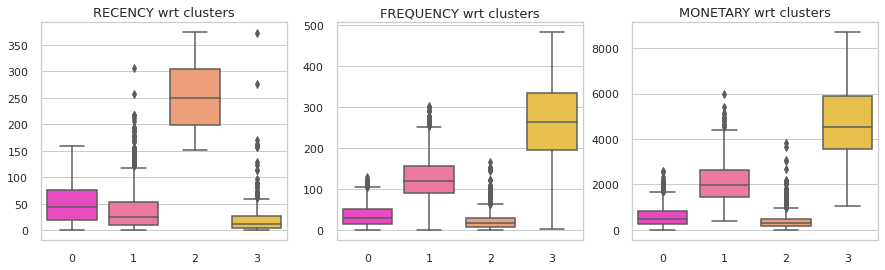

In [52]:
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=RFM_with_sql_kmeans[j], x=RFM_with_sql_kmeans['label'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

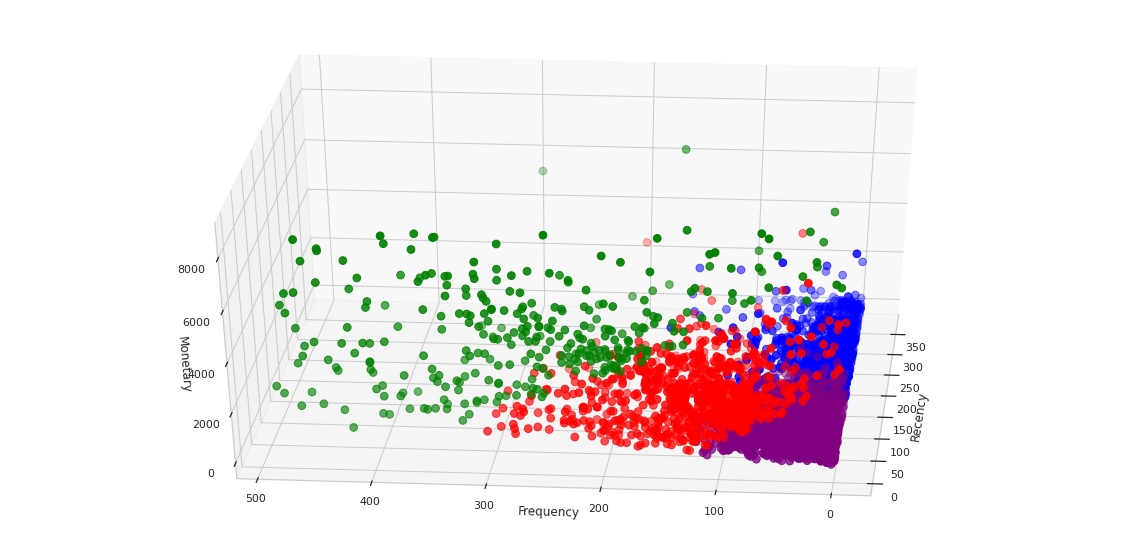

In [60]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM_with_sql_kmeans.Recency[RFM_with_sql_kmeans.label == 0], RFM_with_sql_kmeans["Frequency"][RFM_with_sql_kmeans.label == 0], RFM_with_sql_kmeans["Monetary"][RFM_with_sql_kmeans.label == 0], c='purple', s=60)
ax.scatter(RFM_with_sql_kmeans.Recency[RFM_with_sql_kmeans.label == 1], RFM_with_sql_kmeans["Frequency"][RFM_with_sql_kmeans.label == 1], RFM_with_sql_kmeans["Monetary"][RFM_with_sql_kmeans.label == 1], c='red', s=60)
ax.scatter(RFM_with_sql_kmeans.Recency[RFM_with_sql_kmeans.label == 2], RFM_with_sql_kmeans["Frequency"][RFM_with_sql_kmeans.label == 2], RFM_with_sql_kmeans["Monetary"][RFM_with_sql_kmeans.label == 2], c='blue', s=60)
ax.scatter(RFM_with_sql_kmeans.Recency[RFM_with_sql_kmeans.label == 3], RFM_with_sql_kmeans["Frequency"][RFM_with_sql_kmeans.label == 3], RFM_with_sql_kmeans["Monetary"][RFM_with_sql_kmeans.label == 3], c='green', s=60)

ax.view_init(35, 185)
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
plt.show()



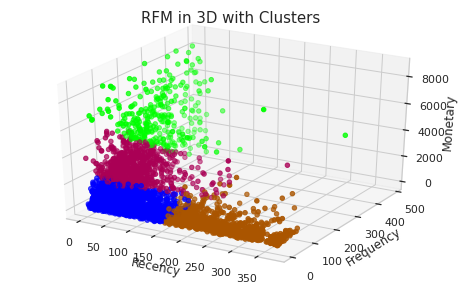

In [63]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(RFM_with_sql_kmeans.Recency, RFM_with_sql_kmeans.Frequency, RFM_with_sql_kmeans.Monetary, c=RFM_with_sql_kmeans.label, cmap='brg')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

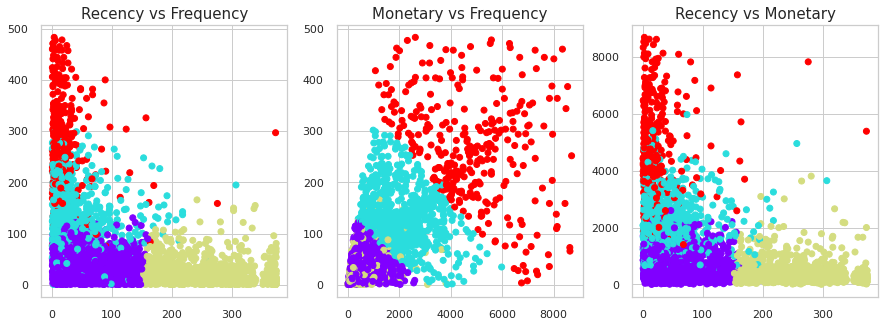

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(RFM_with_sql_cleaned.Recency, RFM_with_sql_cleaned.Frequency, c=y, cmap='rainbow')
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(RFM_with_sql_cleaned.Monetary, RFM_with_sql_cleaned.Frequency, c=y, cmap='rainbow')
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(RFM_with_sql_cleaned.Recency, RFM_with_sql_cleaned.Monetary, c=y, cmap='rainbow')
plt.title('Recency vs Monetary', size=15)
plt.show()